## Running my first notebook

<p>I'll be using this notebook to train a model that can recognize dog and cat photos. To do this, a dataset comprising dog and cat photos will be downloaded, and that will be used to train a model.</p>

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

## Pet Classification

<p>The first few lines below serve to:

* Import all of the fastai.vision library. It gives us all the functions and classes needed to create a variety of computer vision models.
* Download a standard dataset from the fast.ai datasets collection (if not previously downloaded) to the server, extract it (if not previously extracted), and return a `Path` object with the extracted location.

In [2]:
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import *
path = untar_data(URLs.PETS)/'images'

<p> The <i>is_cat</i> function labels cats based on the filename rule provided by the dataset's creators. In other words, the filenames start with an uppercase letter if the image is a cat, and a lowercase letter otherwise.

* For fastai to know what kind of dataset we have and how it is structured, we use `ImageDataLoaders`. Secondly, we need to intruct fastai how to get the labels from the dataset. That is achieved using the <i>is_cat</i> function defined below.
* And then a Transform function is applied, `item_tfms`, which resizes each item to a 224-pixel square.
* The most important parameter is `valid_pct`, which specifies that 20% of the data would comprise the validation set.
* The parameter `seed` sets the random seed to the same value every time we run the code. This means we get the same validation set every time we run it.</p>

In [3]:
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

<p>Now our image recognizer <i>(dls)</i> tells fastai to create a convolutional neural network (CNN) and specifies what artchitecture to use, what data we want to train it on, and what metric to use.

* <i>ResNets</i> are a standard piece of architecture used while implementing CNNs.
* The `34` in `resnet34` refers to the number of layers in this variant of the architecture.
* The metric, a function that measures the quality of the model's predictions using the validation set, was set to `error_rate`, which tells you what percentage of images in the validation set are being classified incorrectly.
* Since we've started with a pretrained model, the `fine_tune` method was used. The "1" in the brackets refers to the number of epochs, i.e., a complete pass through the dataset.</p>

In [4]:
import warnings
warnings.filterwarnings('ignore')
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.174559,0.016330,0.004736,08:12


epoch,train_loss,valid_loss,error_rate,time
0,0.068426,0.005177,0.001353,12:20


In [5]:
#uploader = widgets.FileUpload()
#uploader

FileUpload(value={}, description='Upload')

In [6]:
# Assuming we can't click the upload button
uploader = SimpleNamespace(data = ['../images/chapter1_cat_example.jpg'])

In [7]:
img = PILImage.create(uploader.data[0])
is_cat, _, probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


## Running a Segmentation Model

<p>Creating a model that can recognize the content of every individual pixel in an image is called segmentation.</p>

In [8]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str))

In [9]:
import warnings
warnings.filterwarnings('ignore')
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.419218,2.876316,00:48


epoch,train_loss,valid_loss,time
0,2.282450,2.054041,00:49
1,1.888907,1.419368,00:53
2,1.625412,1.213707,00:45
3,1.434991,1.073627,00:50
4,1.269116,0.973459,01:01
5,1.131243,0.908246,01:10
6,1.018027,0.849210,00:37
7,0.931068,0.835633,00:46


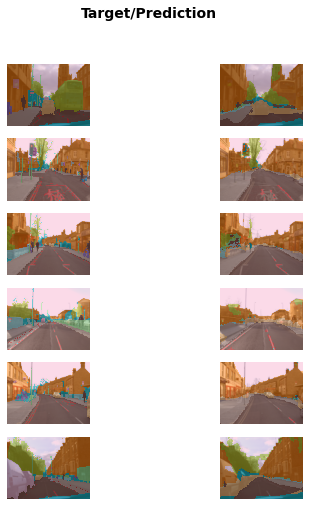

In [10]:
learn.show_results(max_n=6, figsize=(7,8))

## Sentiment Analysis using Natural Language Processing (NLP)

<p>Training a model that can classify the sentiment of a movie review.</p>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from fastai.text.all import *
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')

2024-05-05 02:08:34.306650: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2024-05-05 02:08:34.306731: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


In [ ]:
learn = text_classifier_learner(dls, AWS_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

In [ ]:
learn.predict("I really liked that movie!")

## Predicting whether a person is a high-income earner

<p>We would need to tell fastai which columns are categorical (containing values that are one of a discrete set of choices, such as occupation) versus continuous (containing a number that represents a quantity, such as age).</p>

In [ ]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(3)

## Predicting movies a user might like

<p>Training a model that will predict movies people might like based on their previous viewing habots, using the MovieLens dataset. The model is predicting movie ratings on a scale of 0.5 to 5.0 to within around 0.6 average error.</p>

In [ ]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

In [ ]:
learn.show_results()